### Load libraries, create data stack, compute PCA and prepare PC and coefficients arrays.

In [12]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

stack = np.empty((0,400,400))

for fname in ["nbart_red.npy","nbart_green.npy","nbart_blue.npy",
              "nbart_nir_1.npy","nbart_nir_2.npy","nbart_swir_2.npy",
              "nbart_swir_3.npy"]:
    
    band = np.load(fname)
    stack = np.append(stack, band, axis=0)
    
stack = stack.reshape(stack.shape[0], -1)
    
pca = PCA(n_components=20).fit(stack)
coeffs = pca.transform(stack)
pcs = pca.components_.reshape(-1,400,400)

coeffs.shape, pcs.shape

((735, 20), (20, 400, 400))

### Variability of the coefficients for PCs 2-6

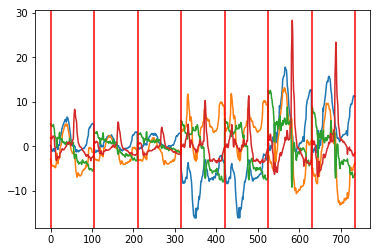

In [9]:
for pci in range(1,5):
    plt.plot(coeffs[:,pci])
for b in range(8):
    plt.axvline(x=b*105,color='r')

### Compute PCA and plot explained variance with the number of components

In [18]:
stack.var(), coeffs.var(), np.variance.reduce(coeffs)

AttributeError: module 'numpy' has no attribute 'variance'

In [15]:
np.__version__

'1.16.3'

### Decompose original data using 20 PCs

In [31]:
pca = PCA(n_components=20).fit(stack)
stackT = pca.transform(stack)

stackT.shape

(735, 20)

### Regenerate initial data using the decomposed components

In [32]:
rec_stack = pca.inverse_transform(stackT)

rec_stack.shape

(735, 160000)

### Write video comparing RGB time series of the original data (left) and recreated PCA (right)

In [37]:
import imageio

writer = imageio.get_writer('video.mp4', fps=2)

for t in range(105):
    orig_r = stack[0*105+t].reshape((400,400))
    rec_r = rec_stack[0*105+t].reshape((400,400))
    orig_g = stack[1*105+t].reshape((400,400))
    rec_g = rec_stack[1*105+t].reshape((400,400))
    orig_b = stack[2*105+t].reshape((400,400))
    rec_b = rec_stack[2*105+t].reshape((400,400))
    
    writer.append_data(3*np.concatenate((np.dstack((orig_r,orig_g,orig_b)),np.dstack((rec_r,rec_g,rec_b))), axis=1))

writer.close()

In [34]:
from IPython.display import Video

Video("video.mp4")

In [9]:
coefs = pca.transform(stack)
comps = pca.components_

def plot_img(band, t):     
    f, axarr = plt.subplots(1,2)
    orig = stack[band*105+t].reshape((400,400))
    rec = rec_stack[band*105+t].reshape((400,400))
    
    axarr[0].imshow(orig, vmin=0, vmax=orig.max())
    axarr[1].imshow(rec, vmin=0, vmax=orig.max())
    
    print(orig.max(), rec.max())
    
def plot_rgb(t):     
    f, axarr = plt.subplots(1,2)
    
    orig_r = stack[0*105+t].reshape((400,400))
    rec_r = rec_stack[0*105+t].reshape((400,400))
    orig_g = stack[1*105+t].reshape((400,400))
    rec_g = rec_stack[1*105+t].reshape((400,400))
    orig_b = stack[2*105+t].reshape((400,400))
    rec_b = rec_stack[2*105+t].reshape((400,400))
    
    axarr[0].imshow(np.dstack((orig_r,orig_g,orig_b))*3)
    axarr[1].imshow(np.dstack((rec_r,rec_g,rec_b))*3)